In [ ]:
!pip install ml_collections
!pip install torchmetrics

     |████████████████████████████████| 77 kB 6.8 MB/s 
  Created wheel for ml-collections: filename=ml_collections-0.1.1-py3-none-any.whl size=94524 sha256=8065f808f964d44650fe18903752b3358a511966795689a572282b76952d5559
  Stored in directory: /root/.cache/pip/wheels/b7/da/64/33c926a1b10ff19791081b705879561b715a8341a856a3bbd2
Successfully built ml-collections
     |████████████████████████████████| 397 kB 16.1 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch, torchvision
import os
from pathlib import Path
import numpy as np
import cv2
import pandas as pd
from tqdm import tqdm
import PIL.Image as Image
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import MaxNLocator
from torch.optim import lr_scheduler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from glob import glob
import shutil
from collections import defaultdict

from torch import nn, optim
from torchvision import datasets

import torch.nn.functional as F
import torchvision.transforms as T
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import models

#%matplotlib inline
#%config InlineBackend.figure_format='retina'

#sns.set(style='whitegrid', palette='muted', font_scale=1.2)

#HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

#sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

#rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
!pip install segmentation-models-pytorch==0.1.0

     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 58 kB 6.9 MB/s 
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60965 sha256=84c1fe9f3382187942d0eace126972d2dae9504f70a37f0d6018c15ebb556d52
  Stored in directory: /root/.cache/pip/wheels/ed/27/e8/9543d42de2740d3544db96aefef63bda3f2c1761b3334f4873
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=3371ece42171e63bbea3160e3c8b32cbfcb183cef6e2c213117421fa4abc900d
  Stored in directory: /root/.cache/pip/wheels/0e/cc/b2/49e74588263573ff778da58cc99b9c6349b496636a7e165be6
Successfully built pretrainedmodels efficientnet-pytorch


In [ ]:
import copy
import logging
import math

from os.path import join as pjoin

import torch
import torch.nn as nn
import numpy as np

from torch.nn import CrossEntropyLoss, Dropout, Softmax, Linear, Conv2d, LayerNorm
from torch.nn.modules.utils import _pair
from scipy import ndimage


import torch, torchvision
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
from pathlib import Path
import numpy as np
import cv2
import pandas as pd
from tqdm import tqdm
import PIL.Image as Image
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import MaxNLocator
from torch.optim import lr_scheduler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from glob import glob
import shutil
from collections import defaultdict

from torch import nn, optim
from torchvision import datasets

import torch.nn.functional as F
from torchvision import transforms 
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import models


#device = torch.device("cpu")
#device
from skimage import io, transform
from torchmetrics import MetricCollection, Accuracy, Precision, Recall, F1



In [ ]:
import torchvision.models as models
densenet = models.densenet201(pretrained=True)

Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth


  0%|          | 0.00/77.4M [00:00<?, ?B/s]

In [ ]:
model= densenet.to(device)

In [ ]:
model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [ ]:
from torchsummary import summary

In [ ]:
summary(densenet,torch.rand(1,3,192,192))

TypeError: ignored

In [ ]:
data_dir = '/content/drive/My Drive/Dataset2/'

In [ ]:
DATASET_PATH = os.path.join(data_dir, "train")
DATASET_PATH1 = os.path.join(data_dir, "val")
DATASET_PATH2 = os.path.join(data_dir, "test")
# define the path to the images and masks dataset
TR_IMAGE_DATASET_PATH = os.path.join(DATASET_PATH, "train_seg")
TR_MASK_DATASET_PATH = os.path.join(DATASET_PATH, "GT_train")

VAL_IMAGE_DATASET_PATH = os.path.join(DATASET_PATH1, "val_seg")
VAL_MASK_DATASET_PATH = os.path.join(DATASET_PATH1, "GT_val")

TEST_IMAGE_DATASET_PATH = os.path.join(DATASET_PATH2, "test_seg")
TEST_MASK_DATASET_PATH = os.path.join(DATASET_PATH2, "GT_test")
# define the test split
TEST_SPLIT = 0.15
# determine the device to be used for training and evaluation
DEVICE = "cpu" #if torch.cuda.is_available() else "cpu"
# determine if we will be pinning memory during data loading
PIN_MEMORY = True if DEVICE == "cuda" else False

In [ ]:
# define the number of channels in the input, number of classes,
# and number of levels in the U-Net model
NUM_CHANNELS = 1
NUM_CLASSES = 1
NUM_LEVELS = 3
# initialize learning rate, number of epochs to train for, and the
# batch size
INIT_LR = 0.001
NUM_EPOCHS = 40
BATCH_SIZE = 16
# define the input image dimensions
INPUT_IMAGE_WIDTH = 192
INPUT_IMAGE_HEIGHT = 192
# define threshold to filter weak predictions
THRESHOLD = 0.5


In [ ]:
import os
import numpy as np
import cv2
import torch
from torch.utils.data import Dataset

class DriveDataset(Dataset):
    def __init__(self, images_path, masks_path):

        self.images_path = images_path
        self.masks_path = masks_path
        self.n_samples = len(images_path)

    def __getitem__(self, index):
        """ Reading image """
        image = cv2.imread(self.images_path[index], cv2.IMREAD_COLOR)
        image = cv2.resize(image, (192, 192))
        image = image/255.0 ## (512, 512, 3)
        #image = np.expand_dims(image, axis=0)
        image = np.transpose(image, (2, 0, 1))  ## (3, 512, 512)
        image = image.astype(np.float32)
        image = torch.from_numpy(image)

        """ Reading mask """
        mask = cv2.imread(self.masks_path[index], cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, (192, 192))
        mask = mask/255.0   ## (512, 512)
        mask = np.expand_dims(mask, axis=0) ## (1, 512, 512)
        mask = mask.astype(np.float32)
        mask = torch.from_numpy(mask)

        return image, mask

    def __len__(self):
        return self.n_samples

In [ ]:
device = torch.device("cpu")
device

device(type='cpu')

In [ ]:
class Activation(nn.Module):
    def __init__(self, name, **params):

        super().__init__()

        if name is None or name == "identity":
            self.activation = nn.Identity(**params)
        elif name == "sigmoid":
            self.activation = nn.Sigmoid()
        elif name == "softmax2d":
            self.activation = nn.Softmax(dim=1, **params)
        elif name == "softmax":
            self.activation = nn.Softmax(**params)
        elif name == "logsoftmax":
            self.activation = nn.LogSoftmax(**params)
        elif name == "tanh":
            self.activation = nn.Tanh()
        elif name == "argmax":
            self.activation = ArgMax(**params)
        elif name == "argmax2d":
            self.activation = ArgMax(dim=1, **params)
        elif name == "clamp":
            self.activation = Clamp(**params)
        elif callable(name):
            self.activation = name(**params)
        else:
            raise ValueError(
                f"Activation should be callable/sigmoid/softmax/logsoftmax/tanh/"
                f"argmax/argmax2d/clamp/None; got {name}"
            )

    def forward(self, x):
        return self.activation(x)


In [ ]:
class SegmentationHead(nn.Sequential):
    def __init__(self, in_channels, out_channels, kernel_size=3, activation=None, upsampling=1):
        conv2d = nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, padding=kernel_size // 2)
        upsampling = nn.UpsamplingBilinear2d(scale_factor=upsampling) if upsampling > 1 else nn.Identity()
        activation = Activation(activation)
        super().__init__(conv2d, upsampling, activation)


class ClassificationHead(nn.Sequential):
    def __init__(self, in_channels, classes, pooling="avg", dropout=0.2, activation=None):
        if pooling not in ("max", "avg"):
            raise ValueError("Pooling should be one of ('max', 'avg'), got {}.".format(pooling))
        pool = nn.AdaptiveAvgPool2d(1) if pooling == "avg" else nn.AdaptiveMaxPool2d(1)
        flatten = nn.Flatten()
        dropout = nn.Dropout(p=dropout, inplace=True) if dropout else nn.Identity()
        linear = nn.Linear(in_channels, classes, bias=True)
        activation = Activation(activation)
        super().__init__(pool, flatten, dropout, linear, activation)

In [ ]:
import torch.nn as nn


def initialize_decoder(module):
    for m in module.modules():

        if isinstance(m, nn.Conv2d):
            nn.init.kaiming_uniform_(m.weight, mode="fan_in", nonlinearity="relu")
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)

        elif isinstance(m, nn.BatchNorm2d):
            nn.init.constant_(m.weight, 1)
            nn.init.constant_(m.bias, 0)

        elif isinstance(m, nn.Linear):
            nn.init.xavier_uniform_(m.weight)
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)


def initialize_head(module):
    for m in module.modules():
        if isinstance(m, (nn.Linear, nn.Conv2d)):
            nn.init.xavier_uniform_(m.weight)
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)
class SegmentationModel(torch.nn.Module):
    def initialize(self):
        initialize_decoder(self.decoder)
        initialize_head(self.segmentation_head)
        if self.classification_head is not None:
            initialize_head(self.classification_head)

    def check_input_shape(self, x):

        h, w = x.shape[-2:]
        output_stride = self.encoder.output_stride
        if h % output_stride != 0 or w % output_stride != 0:
            new_h = (h // output_stride + 1) * output_stride if h % output_stride != 0 else h
            new_w = (w // output_stride + 1) * output_stride if w % output_stride != 0 else w
            raise RuntimeError(
                f"Wrong input shape height={h}, width={w}. Expected image height and width "
                f"divisible by {output_stride}. Consider pad your images to shape ({new_h}, {new_w})."
            )

    def forward(self, x):
        """Sequentially pass `x` trough model`s encoder, decoder and heads"""

        self.check_input_shape(x)

        features = self.encoder(x)
        decoder_output = self.decoder(*features)

        masks = self.segmentation_head(decoder_output)

        if self.classification_head is not None:
            labels = self.classification_head(features[-1])
            return masks, labels

        return masks

    @torch.no_grad()
    def predict(self, x):
        """Inference method. Switch model to `eval` mode, call `.forward(x)` with `torch.no_grad()`
        Args:
            x: 4D torch tensor with shape (batch_size, channels, height, width)
        Return:
            prediction: 4D torch tensor with shape (batch_size, classes, height, width)
        """
        if self.training:
            self.eval()

        x = self.forward(x)

        return x

In [ ]:
import torch
import torch.nn as nn


def patch_first_conv(model, new_in_channels, default_in_channels=3, pretrained=True):
    """Change first convolution layer input channels.
    In case:
        in_channels == 1 or in_channels == 2 -> reuse original weights
        in_channels > 3 -> make random kaiming normal initialization
    """

    # get first conv
    for module in model.modules():
        if isinstance(module, nn.Conv2d) and module.in_channels == default_in_channels:
            break

    weight = module.weight.detach()
    module.in_channels = new_in_channels

    if not pretrained:
        module.weight = nn.parameter.Parameter(
            torch.Tensor(module.out_channels, new_in_channels // module.groups, *module.kernel_size)
        )
        module.reset_parameters()

    elif new_in_channels == 1:
        new_weight = weight.sum(1, keepdim=True)
        module.weight = nn.parameter.Parameter(new_weight)

    else:
        new_weight = torch.Tensor(module.out_channels, new_in_channels // module.groups, *module.kernel_size)

        for i in range(new_in_channels):
            new_weight[:, i] = weight[:, i % default_in_channels]

        new_weight = new_weight * (default_in_channels / new_in_channels)
        module.weight = nn.parameter.Parameter(new_weight)


def replace_strides_with_dilation(module, dilation_rate):
    """Patch Conv2d modules replacing strides with dilation"""
    for mod in module.modules():
        if isinstance(mod, nn.Conv2d):
            mod.stride = (1, 1)
            mod.dilation = (dilation_rate, dilation_rate)
            kh, kw = mod.kernel_size
            mod.padding = ((kh // 2) * dilation_rate, (kh // 2) * dilation_rate)

            # Kostyl for EfficientNet
            if hasattr(mod, "static_padding"):
                mod.static_padding = nn.Identity()


import torch
import torch.nn as nn
from typing import List
from collections import OrderedDict




class EncoderMixin:
    """Add encoder functionality such as:
    - output channels specification of feature tensors (produced by encoder)
    - patching first convolution for arbitrary input channels
    """

    _output_stride = 32

    @property
    def out_channels(self):
        """Return channels dimensions for each tensor of forward output of encoder"""
        return self._out_channels[: self._depth + 1]

    @property
    def output_stride(self):
        return min(self._output_stride, 2 ** self._depth)

    def set_in_channels(self, in_channels, pretrained=True):
        """Change first convolution channels"""
        if in_channels == 3:
            return

        self._in_channels = in_channels
        if self._out_channels[0] == 3:
            self._out_channels = tuple([in_channels] + list(self._out_channels)[1:])

        patch_first_conv(model=self, new_in_channels=in_channels, pretrained=pretrained)

    def get_stages(self):
        """Override it in your implementation"""
        raise NotImplementedError

    def make_dilated(self, output_stride):

        if output_stride == 16:
            stage_list = [
                5,
            ]
            dilation_list = [
                2,
            ]

        elif output_stride == 8:
            stage_list = [4, 5]
            dilation_list = [2, 4]

        else:
            raise ValueError("Output stride should be 16 or 8, got {}.".format(output_stride))

        self._output_stride = output_stride

        stages = self.get_stages()
        for stage_indx, dilation_rate in zip(stage_list, dilation_list):
            replace_strides_with_dilation(
                module=stages[stage_indx],
                dilation_rate=dilation_rate,
            )
              

In [ ]:
import re
import torch.nn as nn

from pretrainedmodels.models.torchvision_models import pretrained_settings
from torchvision.models.densenet import DenseNet


class TransitionWithSkip(nn.Module):
    def __init__(self, module):
        super().__init__()
        self.module = module

    def forward(self, x):
        for module in self.module:
            x = module(x)
            if isinstance(module, nn.ReLU):
                skip = x
        return x, skip


class DenseNetEncoder(DenseNet, EncoderMixin):
    def __init__(self, out_channels, depth=5, **kwargs):
        super().__init__(**kwargs)
        self._out_channels = out_channels
        self._depth = depth
        self._in_channels = 3
        del self.classifier

    def make_dilated(self, *args, **kwargs):
        raise ValueError("DenseNet encoders do not support dilated mode " "due to pooling operation for downsampling!")

    def get_stages(self):
        return [
            nn.Identity(),
            nn.Sequential(self.features.conv0, self.features.norm0, self.features.relu0),
            nn.Sequential(
                self.features.pool0,
                self.features.denseblock1,
                TransitionWithSkip(self.features.transition1),
            ),
            nn.Sequential(self.features.denseblock2, TransitionWithSkip(self.features.transition2)),
            nn.Sequential(self.features.denseblock3, TransitionWithSkip(self.features.transition3)),
            nn.Sequential(self.features.denseblock4, self.features.norm5),
        ]

    def forward(self, x):

        stages = self.get_stages()

        features = []
        for i in range(self._depth + 1):
            x = stages[i](x)
            if isinstance(x, (list, tuple)):
                x, skip = x
                features.append(skip)
            else:
                features.append(x)

        return features

    def load_state_dict(self, state_dict):
        pattern = re.compile(
            r"^(.*denselayer\d+\.(?:norm|relu|conv))\.((?:[12])\.(?:weight|bias|running_mean|running_var))$"
        )
        for key in list(state_dict.keys()):
            res = pattern.match(key)
            if res:
                new_key = res.group(1) + res.group(2)
                state_dict[new_key] = state_dict[key]
                del state_dict[key]

        # remove linear
        state_dict.pop("classifier.bias", None)
        state_dict.pop("classifier.weight", None)

        super().load_state_dict(state_dict)


densenet_encoders = {
    "densenet121": {
        "encoder": DenseNetEncoder,
        "pretrained_settings": pretrained_settings["densenet121"],
        "params": {
            "out_channels": (3, 64, 256, 512, 1024, 1024),
            "num_init_features": 64,
            "growth_rate": 32,
            "block_config": (6, 12, 24, 16),
        },
    },
    "densenet169": {
        "encoder": DenseNetEncoder,
        "pretrained_settings": pretrained_settings["densenet169"],
        "params": {
            "out_channels": (3, 64, 256, 512, 1280, 1664),
            "num_init_features": 64,
            "growth_rate": 32,
            "block_config": (6, 12, 32, 32),
        },
    },
    "densenet201": {
        "encoder": DenseNetEncoder,
        "pretrained_settings": pretrained_settings["densenet201"],
        "params": {
            "out_channels": (3, 64, 256, 512, 1792, 1920),
            "num_init_features": 64,
            "growth_rate": 32,
            "block_config": (6, 12, 48, 32),
        },
    },
    "densenet161": {
        "encoder": DenseNetEncoder,
        "pretrained_settings": pretrained_settings["densenet161"],
        "params": {
            "out_channels": (3, 96, 384, 768, 2112, 2208),
            "num_init_features": 96,
            "growth_rate": 48,
            "block_config": (6, 12, 36, 24),
        },
    },
}

In [ ]:

#import timm
import functools
import torch.utils.model_zoo as model_zoo
encoders = {}

encoders.update(densenet_encoders)

def get_encoder(name, in_channels=3, depth=5, weights=None, output_stride=32, **kwargs):

    if name.startswith("tu-"):
        name = name[3:]
        encoder = TimmUniversalEncoder(
            name=name,
            in_channels=in_channels,
            depth=depth,
            output_stride=output_stride,
            pretrained=weights is not None,
            **kwargs,
        )
        return encoder

    try:
        Encoder = encoders[name]["encoder"]
    except KeyError:
        raise KeyError("Wrong encoder name `{}`, supported encoders: {}".format(name, list(encoders.keys())))

    params = encoders[name]["params"]
    params.update(depth=depth)
    encoder = Encoder(**params)

    if weights is not None:
        try:
            settings = encoders[name]["pretrained_settings"][weights]
        except KeyError:
            raise KeyError(
                "Wrong pretrained weights `{}` for encoder `{}`. Available options are: {}".format(
                    weights,
                    name,
                    list(encoders[name]["pretrained_settings"].keys()),
                )
            )
        encoder.load_state_dict(model_zoo.load_url(settings["url"]))

    encoder.set_in_channels(in_channels, pretrained=weights is not None)
    if output_stride != 32:
        encoder.make_dilated(output_stride)

    return encoder



In [ ]:
import torch
import torch.nn as nn

# try:
#     from inplace_abn import InPlaceABN
# except ImportError:
#     InPlaceABN = None


class Conv2dReLU(nn.Sequential):
    def __init__(
        self,
        in_channels,
        out_channels,
        kernel_size,
        padding=0,
        stride=1,
        use_batchnorm=True,
    ):

        # if use_batchnorm == "inplace" and InPlaceABN is None:
        #     raise RuntimeError(
        #         "In order to use `use_batchnorm='inplace'` inplace_abn package must be installed. "
        #         + "To install see: https://github.com/mapillary/inplace_abn"
        #     )

        conv = nn.Conv2d(
            in_channels,
            out_channels,
            kernel_size,
            stride=stride,
            padding=padding,
            bias=not (use_batchnorm),
        )
        relu = nn.ReLU(inplace=True)

        if use_batchnorm == "inplace":
            bn = InPlaceABN(out_channels, activation="leaky_relu", activation_param=0.0)
            relu = nn.Identity()

        elif use_batchnorm and use_batchnorm != "inplace":
            bn = nn.BatchNorm2d(out_channels)

        else:
            bn = nn.Identity()

        super(Conv2dReLU, self).__init__(conv, bn, relu)


class SCSEModule(nn.Module):
    def __init__(self, in_channels, reduction=16):
        super().__init__()
        self.cSE = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(in_channels, in_channels // reduction, 1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels // reduction, in_channels, 1),
            nn.Sigmoid(),
        )
        self.sSE = nn.Sequential(nn.Conv2d(in_channels, 1, 1), nn.Sigmoid())

    def forward(self, x):
        return x * self.cSE(x) + x * self.sSE(x)


class ArgMax(nn.Module):
    def __init__(self, dim=None):
        super().__init__()
        self.dim = dim

    def forward(self, x):
        return torch.argmax(x, dim=self.dim)


class Clamp(nn.Module):
    def __init__(self, min=0, max=1):
        super().__init__()
        self.min, self.max = min, max

    def forward(self, x):
        return torch.clamp(x, self.min, self.max)


In [ ]:
class TransposeX2(nn.Sequential):
    def __init__(self, in_channels, out_channels, use_batchnorm=True):
        super().__init__()
        layers = [
            nn.ConvTranspose2d(in_channels, out_channels, kernel_size=4, stride=2, padding=1),
            nn.ReLU(inplace=True),
        ]

        if use_batchnorm:
            layers.insert(1, nn.BatchNorm2d(out_channels))

        super().__init__(*layers)


class DecoderBlock(nn.Module):
    def __init__(self, in_channels, out_channels, use_batchnorm=True):
        super().__init__()

        self.block = nn.Sequential(
                Conv2dReLU(
                in_channels,
                in_channels // 4,
                kernel_size=1,
                use_batchnorm=use_batchnorm,
            ),
            TransposeX2(in_channels // 4, in_channels // 4, use_batchnorm=use_batchnorm),
                Conv2dReLU(
                in_channels // 4,
                out_channels,
                kernel_size=1,
                use_batchnorm=use_batchnorm,
            ),
        )

    def forward(self, x, skip=None):
        x = self.block(x)
        if skip is not None:
            x = x + skip
        return x


class LinknetDecoder(nn.Module):
    def __init__(
        self,
        encoder_channels,
        prefinal_channels=32,
        n_blocks=5,
        use_batchnorm=True,
    ):
        super().__init__()

        # remove first skip
        encoder_channels = encoder_channels[1:]
        # reverse channels to start from head of encoder
        encoder_channels = encoder_channels[::-1]

        channels = list(encoder_channels) + [prefinal_channels]

        self.blocks = nn.ModuleList(
            [DecoderBlock(channels[i], channels[i + 1], use_batchnorm=use_batchnorm) for i in range(n_blocks)]
        )

    def forward(self, *features):
        features = features[1:]  # remove first skip
        features = features[::-1]  # reverse channels to start from head of encoder

        x = features[0]
        skips = features[1:]

        for i, decoder_block in enumerate(self.blocks):
            skip = skips[i] if i < len(skips) else None
            x = decoder_block(x, skip)

        return x


In [ ]:
from typing import Optional, Union

# from segmentation_models_pytorch.base import (
#     SegmentationHead,
#     SegmentationModel,
#     ClassificationHead,
# )
# from segmentation_models_pytorch.encoders import get_encoder
# from .decoder import LinknetDecoder
class Linknet(SegmentationModel):
    """Linknet_ is a fully convolution neural network for image semantic segmentation. Consist of *encoder*
    and *decoder* parts connected with *skip connections*. Encoder extract features of different spatial
    resolution (skip connections) which are used by decoder to define accurate segmentation mask. Use *sum*
    for fusing decoder blocks with skip connections.
    Note:
        This implementation by default has 4 skip connections (original - 3).
    Args:
        encoder_name: Name of the classification model that will be used as an encoder (a.k.a backbone)
            to extract features of different spatial resolution
        encoder_depth: A number of stages used in encoder in range [3, 5]. Each stage generate features
            two times smaller in spatial dimensions than previous one (e.g. for depth 0 we will have features
            with shapes [(N, C, H, W),], for depth 1 - [(N, C, H, W), (N, C, H // 2, W // 2)] and so on).
            Default is 5
        encoder_weights: One of **None** (random initialization), **"imagenet"** (pre-training on ImageNet) and
            other pretrained weights (see table with available weights for each encoder_name)
        decoder_use_batchnorm: If **True**, BatchNorm2d layer between Conv2D and Activation layers
            is used. If **"inplace"** InplaceABN will be used, allows to decrease memory consumption.
            Available options are **True, False, "inplace"**
        in_channels: A number of input channels for the model, default is 3 (RGB images)
        classes: A number of classes for output mask (or you can think as a number of channels of output mask)
        activation: An activation function to apply after the final convolution layer.
            Available options are **"sigmoid"**, **"softmax"**, **"logsoftmax"**, **"tanh"**, **"identity"**,
                **callable** and **None**.
            Default is **None**
        aux_params: Dictionary with parameters of the auxiliary output (classification head). Auxiliary output is build
            on top of encoder if **aux_params** is not **None** (default). Supported params:
                - classes (int): A number of classes
                - pooling (str): One of "max", "avg". Default is "avg"
                - dropout (float): Dropout factor in [0, 1)
                - activation (str): An activation function to apply "sigmoid"/"softmax"
                    (could be **None** to return logits)
    Returns:
        ``torch.nn.Module``: **Linknet**
    .. _Linknet:
        https://arxiv.org/abs/1707.03718
    """

    def __init__(
        self,
        encoder_name: str = "resnet34",
        encoder_depth: int = 5,
        encoder_weights: Optional[str] = "imagenet",
        decoder_use_batchnorm: bool = True,
        in_channels: int = 3,
        classes: int = 1,
        activation: Optional[Union[str, callable]] = None,
        aux_params: Optional[dict] = None,
    ):
        super().__init__()

        self.encoder = get_encoder(
            encoder_name,
            in_channels=in_channels,
            depth=encoder_depth,
            weights=encoder_weights,
        )

        self.decoder = LinknetDecoder(
            encoder_channels=self.encoder.out_channels,
            n_blocks=encoder_depth,
            prefinal_channels=32,
            use_batchnorm=decoder_use_batchnorm,
        )

        self.segmentation_head = SegmentationHead(
            in_channels=32, out_channels=classes, activation=activation, kernel_size=1
        )

        if aux_params is not None:
            self.classification_head = ClassificationHead(in_channels=self.encoder.out_channels[-1], **aux_params)
        else:
            self.classification_head = None

        self.name = "link-{}".format(encoder_name)
        self.initialize()


In [ ]:
#import segmentation_models_pytorch as smp
model = Linknet(
    encoder_name="densenet201",        # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
    encoder_weights="imagenet",     # use `imagenet` pre-trained weights for encoder initialization
    in_channels=3,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
    classes=1,                      # model output channels (number of classes in your dataset)
)

In [ ]:
model

Linknet(
  (encoder): DenseNetEncoder(
    (features): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-05, momen

In [ ]:
model=model.to(device)

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable

from collections import OrderedDict
import numpy as np


def summary(model, input_size, batch_size=-1, device=torch.device('cpu'), dtypes=None):
    result, params_info = summary_string(
        model, input_size, batch_size, device, dtypes)
    print(result)

    return params_info


def summary_string(model, input_size, batch_size=-1, device=torch.device('cpu'), dtypes=None):
    if dtypes == None:
        dtypes = [torch.FloatTensor]*len(input_size)

    summary_str = ''

    def register_hook(module):
        def hook(module, input, output):
            class_name = str(module.__class__).split(".")[-1].split("'")[0]
            module_idx = len(summary)

            m_key = "%s-%i" % (class_name, module_idx + 1)
            summary[m_key] = OrderedDict()

            if isinstance(input[0],torch.Tensor):
                summary[m_key]["input_shape"] = list(input[0].size())
            elif isinstance(input[0],list):
                summary[m_key]["input_shape"] = list(np.array(input[0].detach()).shape)
            summary[m_key]["input_shape"][0] = batch_size
            if isinstance(output, (list, tuple)):
                summary[m_key]["output_shape"] = [
                    [-1] + list(o.size())[1:] for o in output
                ]
            else:
                summary[m_key]["output_shape"] = list(output.size())
                summary[m_key]["output_shape"][0] = batch_size

            params = 0
            if hasattr(module, "weight") and hasattr(module.weight, "size"):
                params += torch.prod(torch.LongTensor(list(module.weight.size())))
                summary[m_key]["trainable"] = module.weight.requires_grad
            if hasattr(module, "bias") and hasattr(module.bias, "size"):
                params += torch.prod(torch.LongTensor(list(module.bias.size())))
            summary[m_key]["nb_params"] = params

        if (
            not isinstance(module, nn.Sequential)
            and not isinstance(module, nn.ModuleList)
        ):
            hooks.append(module.register_forward_hook(hook))

    # multiple inputs to the network
    if isinstance(input_size, tuple):
        input_size = [input_size]

    # batch_size of 2 for batchnorm
    x = [torch.rand(2, *in_size).type(dtype).to(device=device)
         for in_size, dtype in zip(input_size, dtypes)]

    # create properties
    summary = OrderedDict()
    hooks = []

    # register hook
    model.apply(register_hook)

    # make a forward pass
    # print(x.shape)
    model(*x)

    # remove these hooks
    for h in hooks:
        h.remove()

    summary_str += "----------------------------------------------------------------" + "\n"
    line_new = "{:>20}  {:>25} {:>15}".format(
        "Layer (type)", "Output Shape", "Param #")
    summary_str += line_new + "\n"
    summary_str += "================================================================" + "\n"
    total_params = 0
    total_output = 0
    trainable_params = 0
    for layer in summary:
        # input_shape, output_shape, trainable, nb_params
        line_new = "{:>20}  {:>25} {:>15}".format(
            layer,
            str(summary[layer]["output_shape"]),
            "{0:,}".format(summary[layer]["nb_params"]),
        )
        total_params += summary[layer]["nb_params"]

        total_output += np.prod(summary[layer]["output_shape"])
        if "trainable" in summary[layer]:
            if summary[layer]["trainable"] == True:
                trainable_params += summary[layer]["nb_params"]
        summary_str += line_new + "\n"

    # assume 4 bytes/number (float on cuda).
    total_input_size = abs(np.prod(sum(input_size, ()))
                           * batch_size * 4. / (1024 ** 2.))
    total_output_size = abs(2. * total_output * 4. /
                            (1024 ** 2.))  # x2 for gradients
    total_params_size = abs(total_params * 4. / (1024 ** 2.))
    total_size = total_params_size + total_output_size + total_input_size

    summary_str += "================================================================" + "\n"
    summary_str += "Total params: {0:,}".format(total_params) + "\n"
    summary_str += "Trainable params: {0:,}".format(trainable_params) + "\n"
    summary_str += "Non-trainable params: {0:,}".format(total_params -
                                                        trainable_params) + "\n"
    summary_str += "----------------------------------------------------------------" + "\n"
    summary_str += "Input size (MB): %0.2f" % total_input_size + "\n"
    summary_str += "Forward/backward pass size (MB): %0.2f" % total_output_size + "\n"
    summary_str += "Params size (MB): %0.2f" % total_params_size + "\n"
    summary_str += "Estimated Total Size (MB): %0.2f" % total_size + "\n"
    summary_str += "----------------------------------------------------------------" + "\n"
    # return summary
    return summary_str, (total_params, trainable_params)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DiceLoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(DiceLoss, self).__init__()

    def forward(self, inputs, targets, smooth=1):

        #comment out if your model contains a sigmoid or equivalent activation layer
        #inputs = torch.sigmoid(inputs)

        #flatten label and prediction tensors
        inputs = inputs.view(-1)
        targets = targets.view(-1)

        intersection = (inputs * targets).sum()
        dice = (2.*intersection + smooth)/(inputs.sum() + targets.sum() + smooth)

        return 1 - dice

class DiceBCELoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(DiceBCELoss, self).__init__()

    def forward(self, inputs, targets, smooth=1):

        #comment out if your model contains a sigmoid or equivalent activation layer
        #inputs = torch.sigmoid(inputs)
        #if softmax:
        #print(inputs)
        #print(inputs.shape)
        inputs = torch.sigmoid(inputs)
        #print(inputs)
        #print(inputs.shape)
        #flatten label and prediction tensors
        inputs = inputs.view(-1)
        targets = targets.view(-1)

        intersection = (inputs * targets).sum()
        dice_loss = 1 - (2.*intersection + smooth)/(inputs.sum() + targets.sum() + smooth)
        BCE = F.binary_cross_entropy(inputs, targets, reduction='mean')
        Dice_BCE = BCE + dice_loss

        return Dice_BCE

In [ ]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
train_metrics = MetricCollection([Accuracy(), Precision(num_classes=1, average='micro'), Recall(num_classes=1, average='micro'), F1(num_classes=1,average='micro')]).to(device)

/usr/local/lib/python3.7/dist-packages/deprecate/deprecation.py:115: FutureWarning: The `F1` was deprecated since v0.7 in favor of `torchmetrics.classification.f_beta.F1Score`. It will be removed in v0.8.
  stream(template_mgs % msg_args)


In [ ]:
import os
import time
from glob import glob

import torch
from torch.utils.data import DataLoader
import torch.nn as nn



def train(model, loader, optimizer, loss_fn, device):
    epoch_loss = 0.0
    train_metrics.reset()
    model.train()
    for x, y in loader:
        x = x.to(device, dtype=torch.float32)
        y = y.to(device, dtype=torch.float32)

        optimizer.zero_grad()
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        train_metric = train_metrics(torch.sigmoid(y_pred.flatten()), y.flatten().type(torch.int))

    epoch_loss = epoch_loss/len(loader)
    train_results = train_metrics.compute()
    #epoch_loss = running_loss / n_batches
    #print(f"Epoch: {epoch} - Train Loss {epoch_loss:.4f} - Train Metrics:{train_results}")
    #print(f"Train{tr_iou}, Test{ts_iou}")
    
    return epoch_loss,train_results

def evaluate(model, loader, loss_fn, device):
    epoch_loss = 0.0

    model.eval()
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device, dtype=torch.float32)
            y = y.to(device, dtype=torch.float32)

            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            epoch_loss += loss.item()
            train_metric = train_metrics(torch.sigmoid(y_pred.flatten()), y.flatten().type(torch.int))


        epoch_loss = epoch_loss/len(loader)
        val_results = train_metrics.compute()
    return epoch_loss,val_results


""" Load dataset """
train_x = sorted(glob("/content/drive/My Drive/Dataset2/train/images/*"))
train_y = sorted(glob("/content/drive/My Drive/Dataset2/train/masks/*"))

valid_x = sorted(glob("/content/drive/My Drive/Dataset2/val/images/*"))
valid_y = sorted(glob("/content/drive/My Drive/Dataset2/val/masks/*"))

data_str = f"Dataset Size:\nTrain: {len(train_x)} - Valid: {len(valid_x)}\n"
print(data_str)

""" Hyperparameters """
H = 256
W = 256
size = (H, W)
batch_size = 4
num_epochs = 80
lr = 1e-4
checkpoint_path = '/content/drive/My Drive/Results/Weight/linknet_pytorch2new.pth'

""" Dataset and loader """
train_dataset = DriveDataset(train_x, train_y)
valid_dataset = DriveDataset(valid_x, valid_y)

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=2
)

valid_loader = DataLoader(
    dataset=valid_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=2
)

device = torch.device('cuda')   ## GTX 1060 6GB
#model = build_unet()
#model = model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=lr)
#scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, verbose=True)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.8, patience=2, 
                                             threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=0.000001, eps=1e-08, verbose=True)
loss_fn = DiceBCELoss()

""" Training the model """
best_valid_loss = float("inf")

for epoch in range(num_epochs):
    start_time = time.time()

    train_loss,train_results = train(model, train_loader, optimizer, loss_fn, device)
    valid_loss,val_results = evaluate(model, valid_loader, loss_fn, device)

    """ Saving the model """
    if valid_loss < best_valid_loss:
        data_str = f"Valid loss improved from {best_valid_loss:2.4f} to {valid_loss:2.4f}. Saving checkpoint: {checkpoint_path}"
        print(data_str)

        best_valid_loss = valid_loss
        torch.save(model.state_dict(), checkpoint_path)
  
    #scheduler.step(valid_loss)

    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    data_str = f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s\n'
    data_str += f'\tTrain Loss: {train_loss:.3f} - Train Metrics:{train_results}\n'
    data_str += f'\t Val. Loss: {valid_loss:.3f} - Val Metrics:{val_results}\n'
    print(data_str)

Dataset Size:
Train: 312 - Valid: 79

Valid loss improved from inf to 1.0160. Saving checkpoint: /content/drive/My Drive/Results/Weight/linknet_pytorch2new.pth
Epoch: 01 | Epoch Time: 2m 29s
	Train Loss: 1.183 - Train Metrics:{'Accuracy': tensor(0.7961, device='cuda:0'), 'Precision': tensor(0.1696, device='cuda:0'), 'Recall': tensor(0.4095, device='cuda:0'), 'F1': tensor(0.2398, device='cuda:0')}
	 Val. Loss: 1.016 - Val Metrics:{'Accuracy': tensor(0.7994, device='cuda:0'), 'Precision': tensor(0.1706, device='cuda:0'), 'Recall': tensor(0.4367, device='cuda:0'), 'F1': tensor(0.2454, device='cuda:0')}

Valid loss improved from 1.0160 to 0.8291. Saving checkpoint: /content/drive/My Drive/Results/Weight/linknet_pytorch2new.pth
Epoch: 02 | Epoch Time: 1m 6s
	Train Loss: 0.893 - Train Metrics:{'Accuracy': tensor(0.7755, device='cuda:0'), 'Precision': tensor(0.2382, device='cuda:0'), 'Recall': tensor(0.8447, device='cuda:0'), 'F1': tensor(0.3716, device='cuda:0')}
	 Val. Loss: 0.829 - Val Met

  0%|          | 0/98 [00:00<?, ?it/s]

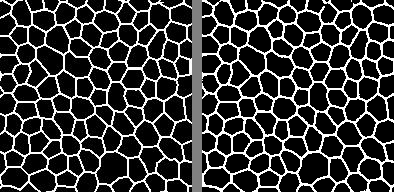

  1%|          | 1/98 [00:00<00:24,  3.98it/s]

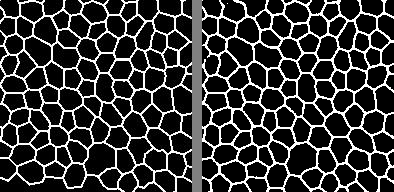

  2%|▏         | 2/98 [00:00<00:23,  4.00it/s]

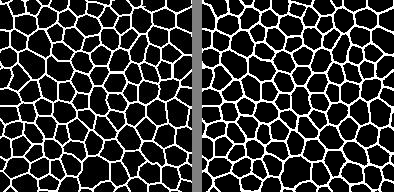

  3%|▎         | 3/98 [00:00<00:27,  3.48it/s]

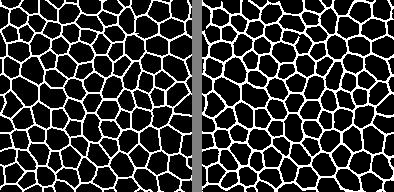

  4%|▍         | 4/98 [00:01<00:26,  3.54it/s]

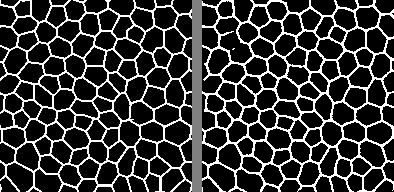

  5%|▌         | 5/98 [00:01<00:25,  3.70it/s]

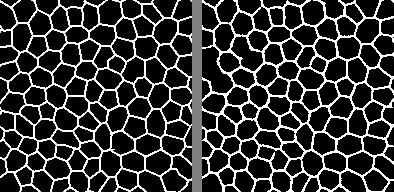

  6%|▌         | 6/98 [00:01<00:24,  3.77it/s]

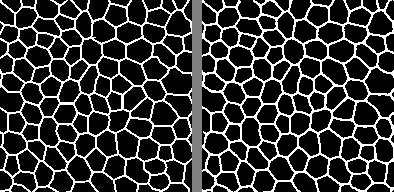

  7%|▋         | 7/98 [00:01<00:23,  3.83it/s]

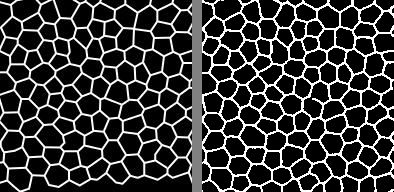

  8%|▊         | 8/98 [00:02<00:23,  3.85it/s]

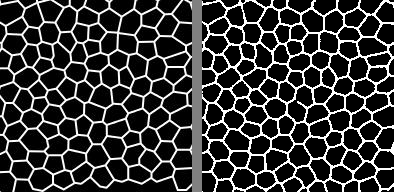

  9%|▉         | 9/98 [00:02<00:23,  3.85it/s]

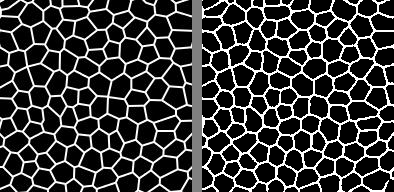

 10%|█         | 10/98 [00:02<00:22,  3.86it/s]

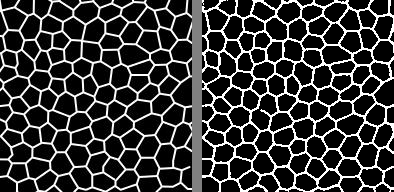

 11%|█         | 11/98 [00:02<00:22,  3.87it/s]

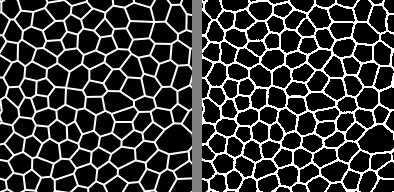

 12%|█▏        | 12/98 [00:03<00:22,  3.84it/s]

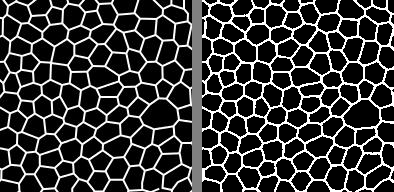

 13%|█▎        | 13/98 [00:03<00:22,  3.83it/s]

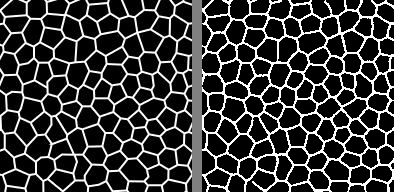

 14%|█▍        | 14/98 [00:03<00:21,  3.83it/s]

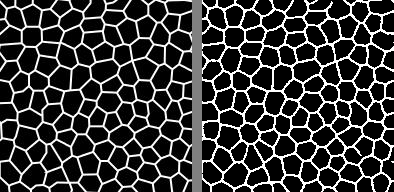

 15%|█▌        | 15/98 [00:03<00:21,  3.83it/s]

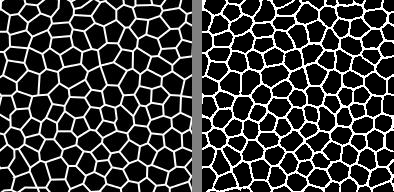

 16%|█▋        | 16/98 [00:04<00:21,  3.82it/s]

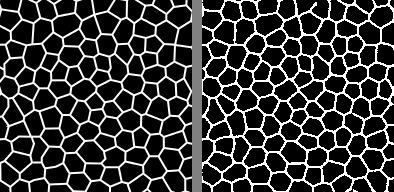

 17%|█▋        | 17/98 [00:04<00:20,  3.87it/s]

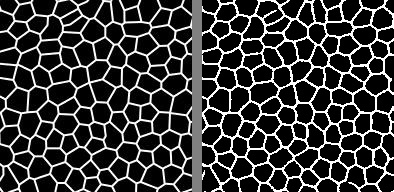

 18%|█▊        | 18/98 [00:04<00:20,  3.84it/s]

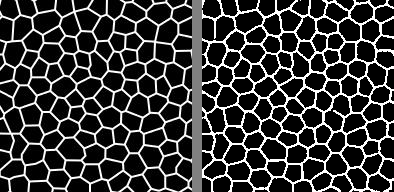

 19%|█▉        | 19/98 [00:04<00:20,  3.84it/s]

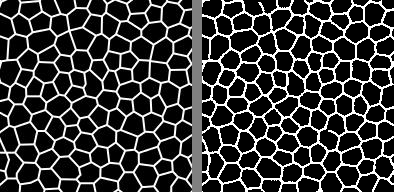

 20%|██        | 20/98 [00:05<00:20,  3.85it/s]

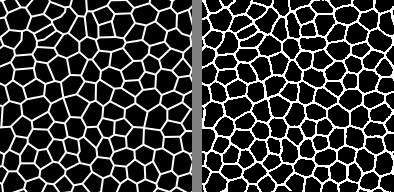

 21%|██▏       | 21/98 [00:05<00:20,  3.82it/s]

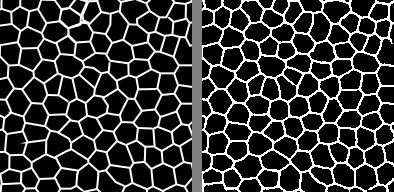

 22%|██▏       | 22/98 [00:05<00:19,  3.83it/s]

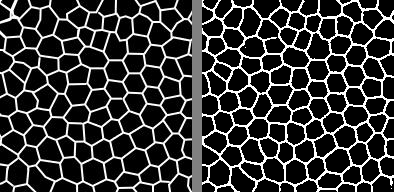

 23%|██▎       | 23/98 [00:06<00:19,  3.86it/s]

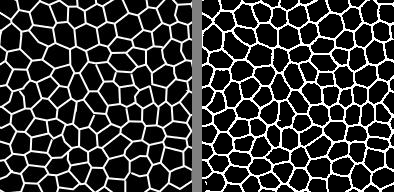

 24%|██▍       | 24/98 [00:06<00:19,  3.89it/s]

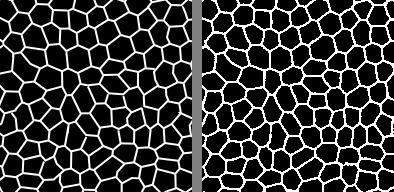

 26%|██▌       | 25/98 [00:06<00:18,  3.86it/s]

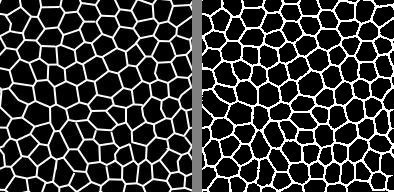

 27%|██▋       | 26/98 [00:06<00:18,  3.84it/s]

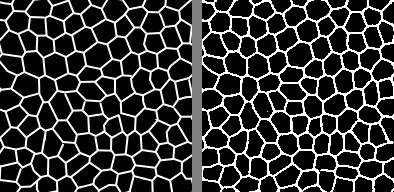

 28%|██▊       | 27/98 [00:07<00:18,  3.88it/s]

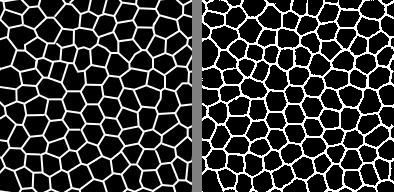

 29%|██▊       | 28/98 [00:07<00:18,  3.83it/s]

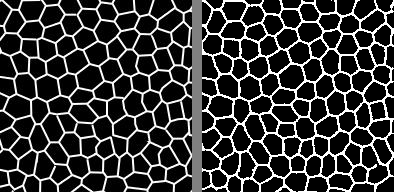

 30%|██▉       | 29/98 [00:07<00:17,  3.88it/s]

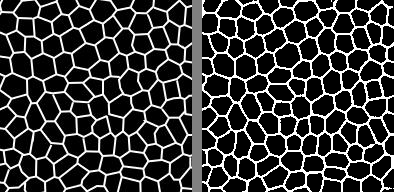

 31%|███       | 30/98 [00:07<00:17,  3.93it/s]

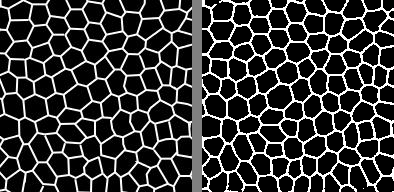

 32%|███▏      | 31/98 [00:08<00:17,  3.92it/s]

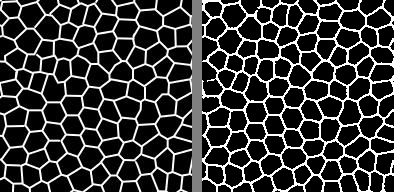

 33%|███▎      | 32/98 [00:08<00:17,  3.85it/s]

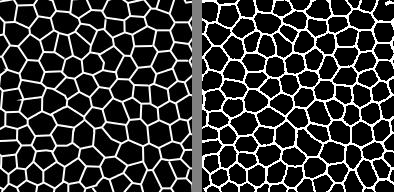

 34%|███▎      | 33/98 [00:08<00:16,  3.86it/s]

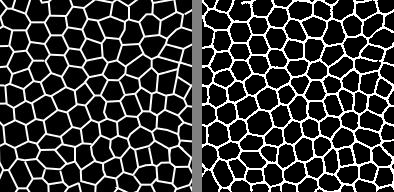

 35%|███▍      | 34/98 [00:08<00:16,  3.87it/s]

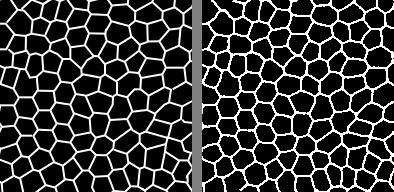

 36%|███▌      | 35/98 [00:09<00:16,  3.92it/s]

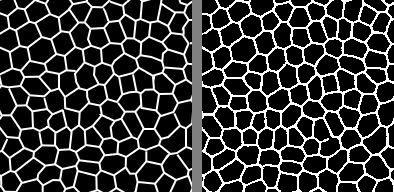

 37%|███▋      | 36/98 [00:09<00:15,  3.89it/s]

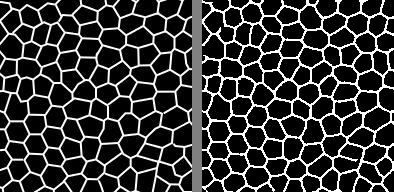

 38%|███▊      | 37/98 [00:09<00:15,  3.88it/s]

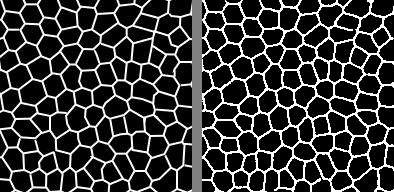

 39%|███▉      | 38/98 [00:09<00:15,  3.90it/s]

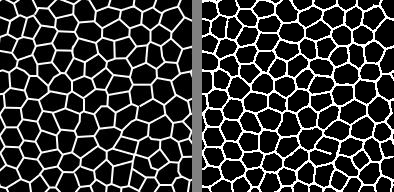

 40%|███▉      | 39/98 [00:10<00:15,  3.91it/s]

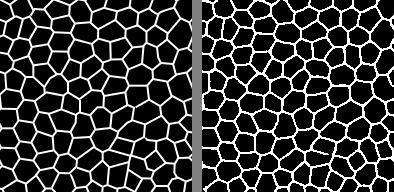

 41%|████      | 40/98 [00:10<00:15,  3.84it/s]

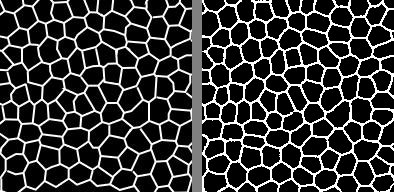

 42%|████▏     | 41/98 [00:10<00:14,  3.84it/s]

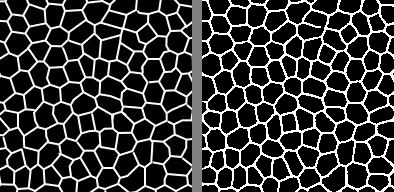

 43%|████▎     | 42/98 [00:10<00:14,  3.79it/s]

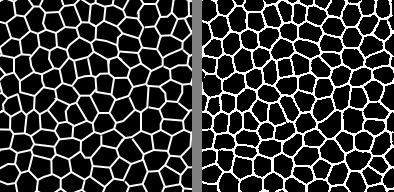

 44%|████▍     | 43/98 [00:11<00:14,  3.84it/s]

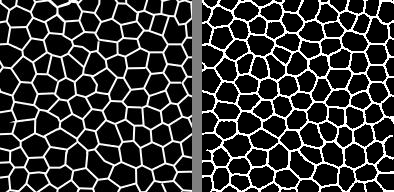

 45%|████▍     | 44/98 [00:11<00:13,  3.86it/s]

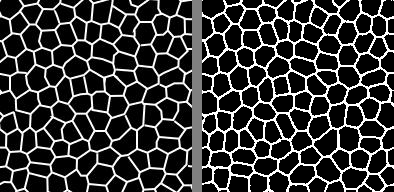

 46%|████▌     | 45/98 [00:11<00:13,  3.83it/s]

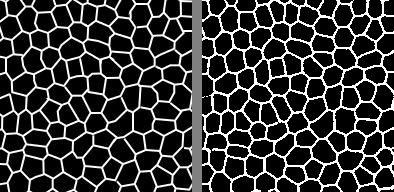

 47%|████▋     | 46/98 [00:11<00:13,  3.88it/s]

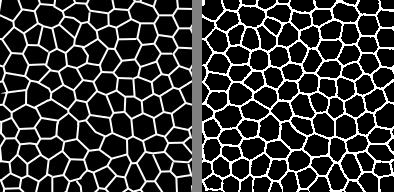

 48%|████▊     | 47/98 [00:12<00:13,  3.87it/s]

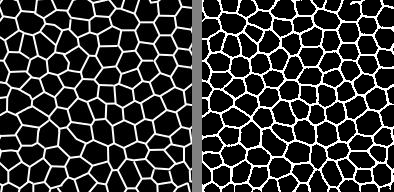

 49%|████▉     | 48/98 [00:12<00:13,  3.82it/s]

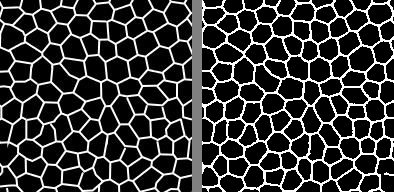

 50%|█████     | 49/98 [00:12<00:12,  3.78it/s]

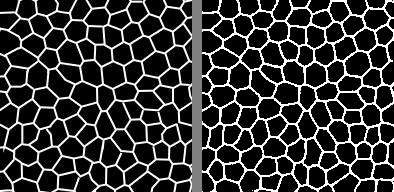

 51%|█████     | 50/98 [00:13<00:12,  3.82it/s]

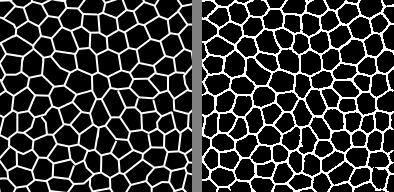

 52%|█████▏    | 51/98 [00:13<00:12,  3.85it/s]

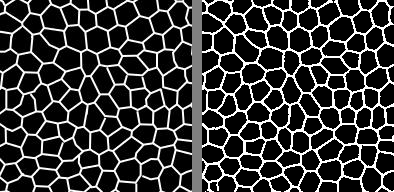

 53%|█████▎    | 52/98 [00:13<00:12,  3.81it/s]

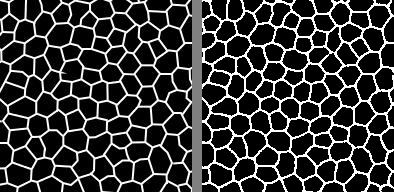

 54%|█████▍    | 53/98 [00:13<00:11,  3.86it/s]

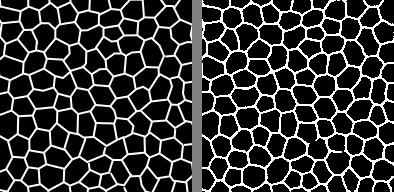

 55%|█████▌    | 54/98 [00:14<00:11,  3.84it/s]

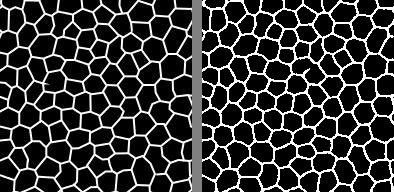

 56%|█████▌    | 55/98 [00:14<00:11,  3.87it/s]

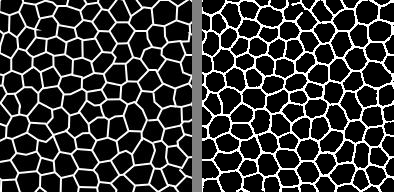

 57%|█████▋    | 56/98 [00:14<00:10,  3.85it/s]

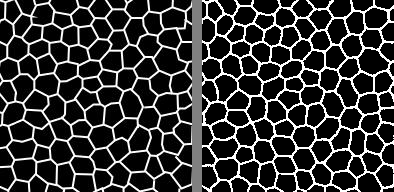

 58%|█████▊    | 57/98 [00:14<00:10,  3.84it/s]

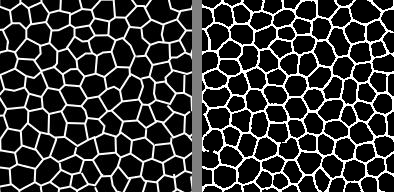

 59%|█████▉    | 58/98 [00:15<00:10,  3.82it/s]

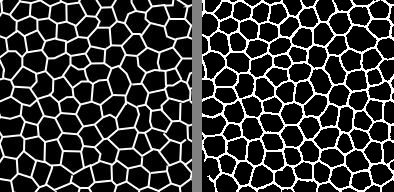

 60%|██████    | 59/98 [00:15<00:10,  3.80it/s]

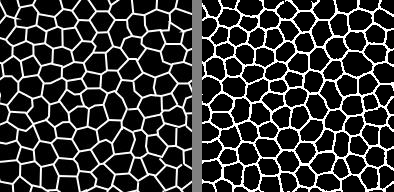

 61%|██████    | 60/98 [00:15<00:09,  3.82it/s]

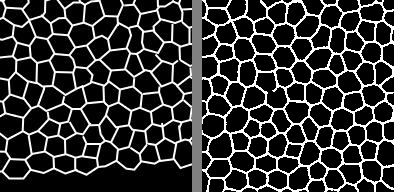

 62%|██████▏   | 61/98 [00:15<00:09,  3.82it/s]

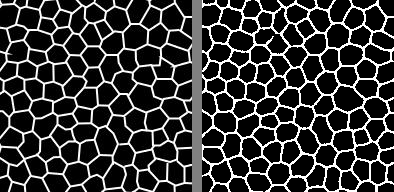

 63%|██████▎   | 62/98 [00:16<00:09,  3.83it/s]

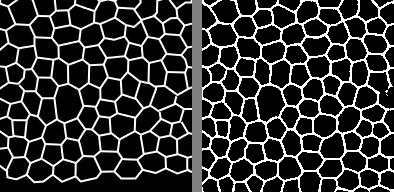

 64%|██████▍   | 63/98 [00:16<00:09,  3.78it/s]

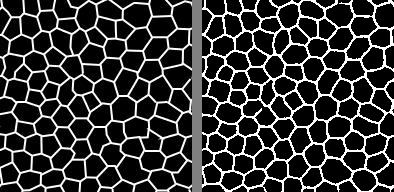

 65%|██████▌   | 64/98 [00:16<00:09,  3.73it/s]

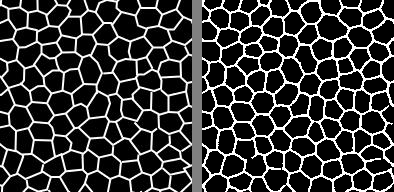

 66%|██████▋   | 65/98 [00:16<00:08,  3.77it/s]

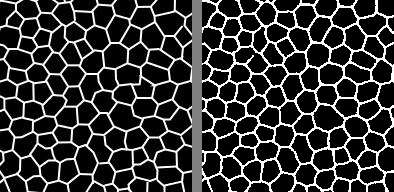

 67%|██████▋   | 66/98 [00:17<00:08,  3.76it/s]

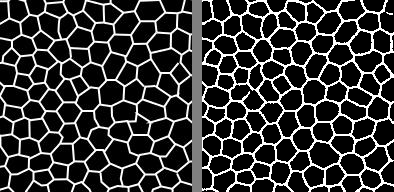

 68%|██████▊   | 67/98 [00:17<00:08,  3.77it/s]

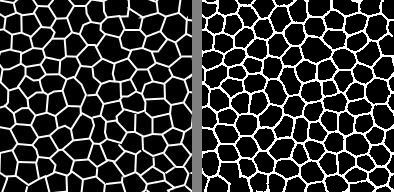

 69%|██████▉   | 68/98 [00:17<00:07,  3.79it/s]

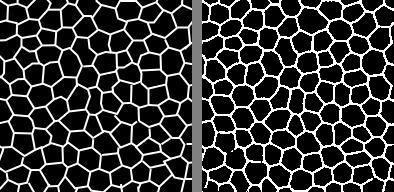

 70%|███████   | 69/98 [00:18<00:07,  3.79it/s]

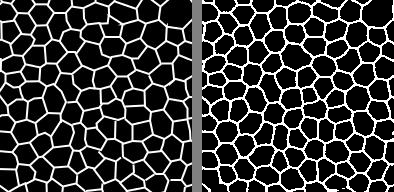

 71%|███████▏  | 70/98 [00:18<00:07,  3.80it/s]

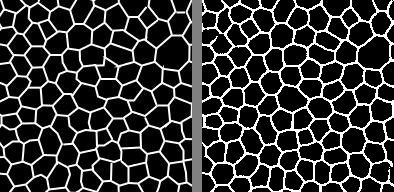

 72%|███████▏  | 71/98 [00:18<00:07,  3.74it/s]

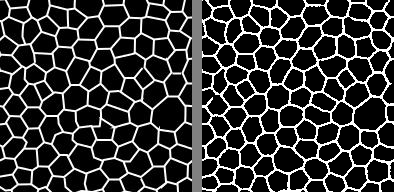

 73%|███████▎  | 72/98 [00:18<00:06,  3.77it/s]

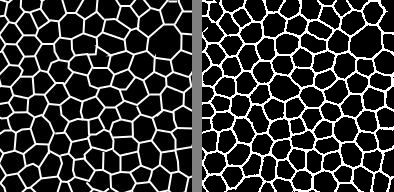

 74%|███████▍  | 73/98 [00:19<00:06,  3.83it/s]

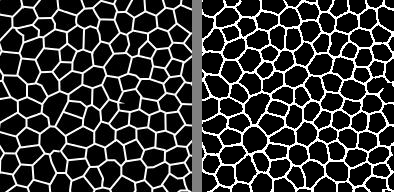

 76%|███████▌  | 74/98 [00:19<00:06,  3.85it/s]

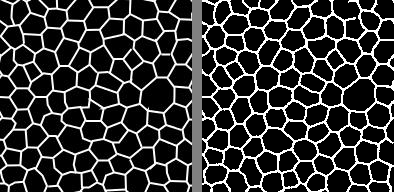

 77%|███████▋  | 75/98 [00:19<00:06,  3.80it/s]

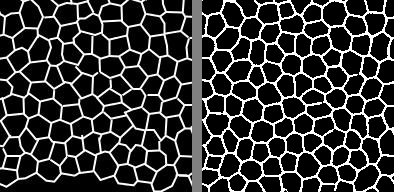

 78%|███████▊  | 76/98 [00:19<00:05,  3.78it/s]

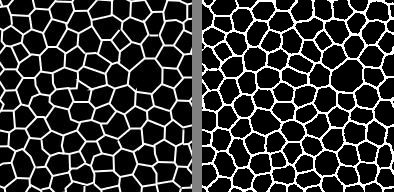

 79%|███████▊  | 77/98 [00:20<00:05,  3.77it/s]

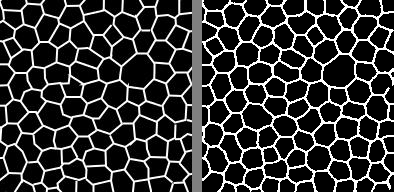

 80%|███████▉  | 78/98 [00:20<00:05,  3.76it/s]

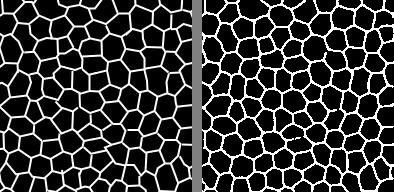

 81%|████████  | 79/98 [00:20<00:05,  3.75it/s]

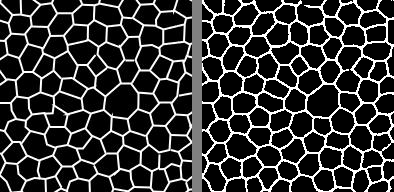

 82%|████████▏ | 80/98 [00:20<00:04,  3.79it/s]

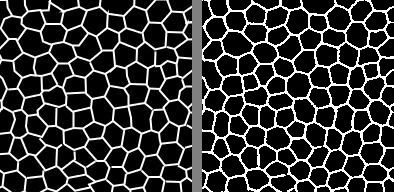

 83%|████████▎ | 81/98 [00:21<00:04,  3.84it/s]

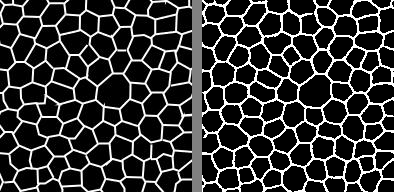

 84%|████████▎ | 82/98 [00:21<00:04,  3.88it/s]

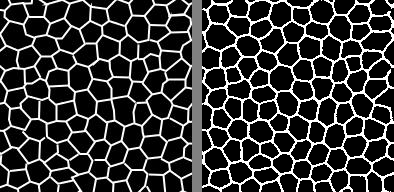

 85%|████████▍ | 83/98 [00:21<00:03,  3.82it/s]

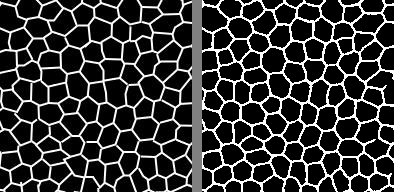

 86%|████████▌ | 84/98 [00:21<00:03,  3.80it/s]

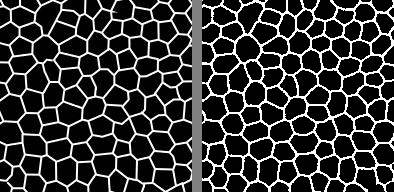

 87%|████████▋ | 85/98 [00:22<00:03,  3.81it/s]

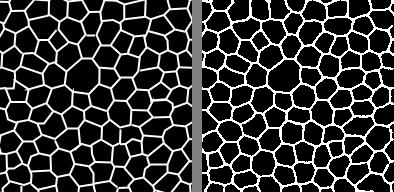

 88%|████████▊ | 86/98 [00:22<00:03,  3.81it/s]

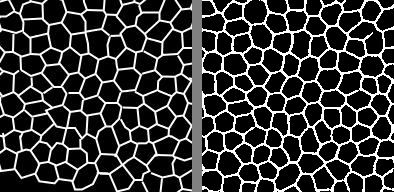

 89%|████████▉ | 87/98 [00:22<00:02,  3.72it/s]

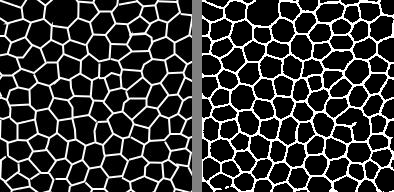

 90%|████████▉ | 88/98 [00:23<00:02,  3.70it/s]

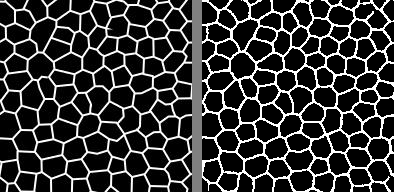

 91%|█████████ | 89/98 [00:23<00:02,  3.67it/s]

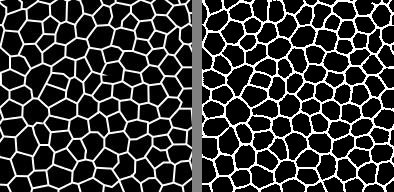

 92%|█████████▏| 90/98 [00:23<00:02,  3.62it/s]

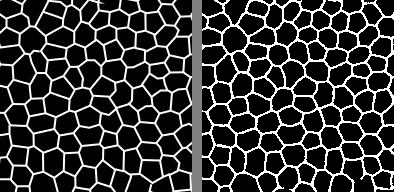

 93%|█████████▎| 91/98 [00:23<00:01,  3.68it/s]

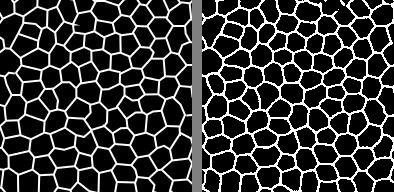

 94%|█████████▍| 92/98 [00:24<00:01,  3.66it/s]

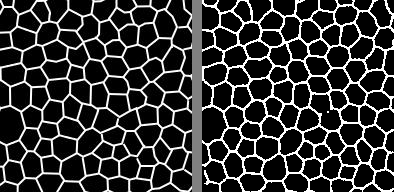

 95%|█████████▍| 93/98 [00:24<00:01,  3.72it/s]

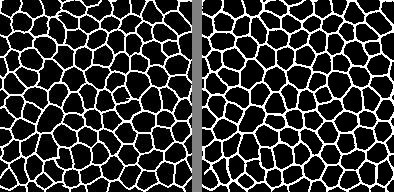

 96%|█████████▌| 94/98 [00:24<00:01,  3.68it/s]

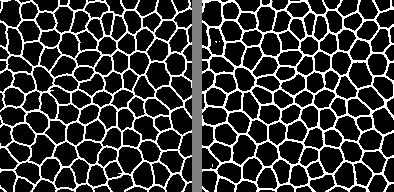

 97%|█████████▋| 95/98 [00:24<00:00,  3.73it/s]

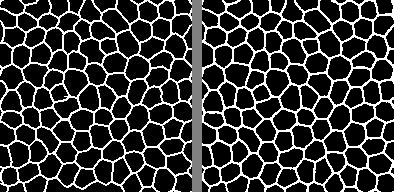

 98%|█████████▊| 96/98 [00:25<00:00,  3.77it/s]

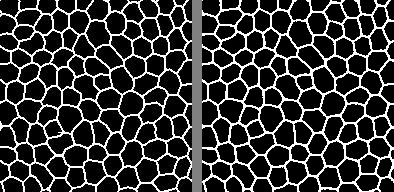

 99%|█████████▉| 97/98 [00:25<00:00,  3.80it/s]

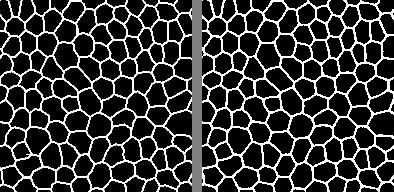

100%|██████████| 98/98 [00:25<00:00,  3.81it/s]

Jaccard: 0.6251 - F1: 0.7682 - Recall: 0.8101 - Specificity: 0.9297 - Precision: 0.7305 - Acc: 0.9069
FPS:  5.458143252238484


In [ ]:
import os, time
from operator import add
import numpy as np
from glob import glob
import cv2
from tqdm import tqdm
import imageio
import torch
from sklearn.metrics import accuracy_score, f1_score, jaccard_score, precision_score, recall_score
from google.colab.patches import cv2_imshow
from sklearn.metrics import confusion_matrix

#from model import build_unet
#from utils import create_dir, seeding

def calculate_metrics(y_true, y_pred):
    """ Ground truth """
    y_true = y_true.cpu().numpy()
    y_true = y_true > 0.5
    y_true = y_true.astype(np.uint8)
    y_true = y_true.reshape(-1)

    """ Prediction """
    y_pred = y_pred.cpu().numpy()
    y_pred = y_pred > 0.5
    y_pred = y_pred.astype(np.uint8)
    y_pred = y_pred.reshape(-1)

    score_jaccard = jaccard_score(y_true, y_pred)
    score_f1 = f1_score(y_true, y_pred)
    score_recall = recall_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    score_precision = precision_score(y_true, y_pred)
    score_acc = accuracy_score(y_true, y_pred)

    return [score_jaccard, score_f1, score_recall, specificity,score_precision, score_acc]

def mask_parse(mask):
    mask = np.expand_dims(mask, axis=-1)    ## (512, 512, 1)
    mask = np.concatenate([mask, mask, mask], axis=-1)  ## (512, 512, 3)
    return mask

checkpoint_path = '/content/drive/My Drive/Results/Weight/linknet_pytorch2new.pth'
""" Load dataset """
test_x = sorted(glob("/content/drive/My Drive/Dataset2/test/images/*"))
test_y = sorted(glob("/content/drive/My Drive/Dataset2/test/masks/*"))

""" Hyperparameters """
H = 192
W = 192
size = (W, H)


""" Load the checkpoint """
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#model = build_unet()
#model = model.to(device)
model.load_state_dict(torch.load(checkpoint_path, map_location=device))
model.eval()

metrics_score = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
time_taken = []

for i, (x, y) in tqdm(enumerate(zip(test_x, test_y)), total=len(test_x)):
    """ Extract the name """
    name = x.split("/")[-1].split(".")[0]

    """ Reading image """
    image = cv2.imread(x, cv2.IMREAD_COLOR) ## (512, 512, 3)
    image = cv2.resize(image, (192,192))
    #print(image.shape)
    x = np.transpose(image, (2, 0, 1))
    #print(x.shape)      ## (3, 512, 512)
    x = x/255.0
    x = np.expand_dims(x, axis=0)           ## (1, 3, 512, 512)
    x = x.astype(np.float32)
    x = torch.from_numpy(x)
    x = x.to(device)

    """ Reading mask """
    mask = cv2.imread(y, cv2.IMREAD_GRAYSCALE)  ## (512, 512)
    mask = cv2.resize(mask, (192,192))
    y = np.expand_dims(mask, axis=0)            ## (1, 512, 512)
    y = y/255.0
    y = np.expand_dims(y, axis=0)               ## (1, 1, 512, 512)
    y = y.astype(np.float32)
    y = torch.from_numpy(y)
    y = y.to(device)

    with torch.no_grad():
        """ Prediction and Calculating FPS """
        start_time = time.time()
        pred_y = model(x)
        pred_y = torch.sigmoid(pred_y)
        total_time = time.time() - start_time
        time_taken.append(total_time)


        score = calculate_metrics(y, pred_y)
        metrics_score = list(map(add, metrics_score, score))
        pred_y = pred_y[0].cpu().numpy()        ## (1, 512, 512)
        pred_y = np.squeeze(pred_y, axis=0)     ## (512, 512)
        pred_y = pred_y > 0.5
        pred_y = np.array(pred_y, dtype=np.uint8)

    """ Saving masks """
    #ori_mask = mask_parse(mask)
    #pred_y = mask_parse(pred_y)
    line = np.ones((size[1], 10)) * 128
    #print(image.shape)
    #print(line.shape)
    #print(mask.shape)


    cat_images = np.concatenate(
        [mask, line, pred_y * 255], axis=1
    )
    #cv2.imwrite(f"/content/drive/My Drive/Image_segmentation/results/{name}.png", cat_images)
    cv2_imshow(cat_images)


jaccard = metrics_score[0]/len(test_x)
f1 = metrics_score[1]/len(test_x)
recall = metrics_score[2]/len(test_x)
specificity = metrics_score[3]/len(test_x)
precision = metrics_score[4]/len(test_x)
acc = metrics_score[5]/len(test_x)
print(f"Jaccard: {jaccard:1.4f} - F1: {f1:1.4f} - Recall: {recall:1.4f} - Specificity: {specificity:1.4f} - Precision: {precision:1.4f} - Acc: {acc:1.4f}")

fps = 1/np.mean(time_taken)
print("FPS: ", fps)
